In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [2]:
filenames = ['df_t0_ratio.csv','df_t0_ratio_repeat.csv', 'df_t30_ratio.csv',
             'df_t60_ratio.csv','df_t90_ratio.csv', 'df_t120_ratio.csv']
# Create list of filenames to be read

dataframes = [pd.read_csv(file) for file in filenames]
# Use list comprehension to generate list of read dataframes

df_mean = dataframes[0][['Condition', 'Mean Ratio']]
# Create the an initial dataframe by taking the slug identity and and '0' columns of the t0 data.


for file in dataframes[1:]:
        df_mean = pd.concat([df_mean, file['Mean Ratio']],
                       axis=1, ignore_index=True)
# Concatenate subsequent dataframe's 'Averaged Vinyl Divide Aromatic' column along the columns axis and ignore the index.
        
col_names = {0:'Condition',
            1:'t0_mean',
            2:'t0_mean_repeat', 
            3:'t30_mean',
            4:'t60_mean',
            5:'t90_mean',
            6:'t120_mean'}
df_mean.rename(columns=col_names, inplace=True)
# Rename columns

df_mean
# Check df_mean

,Condition,t0_mean,t0_mean_repeat,t30_mean,t60_mean,t90_mean,t120_mean
0,19,0.883997,0.997036,0.769864,0.826025,0.828335,0.948431
1,20,1.051840,1.133306,0.935273,0.848271,0.839453,0.910970
2,21,1.085672,1.162405,0.940060,0.868751,0.834786,0.883105
3,22,1.565351,1.734748,1.405966,1.271285,1.224425,1.347367
4,23,1.638614,1.839062,1.445462,1.267293,1.239562,1.325808
5,24,1.656258,1.776108,1.420879,1.276951,1.223910,1.275764
6,25,2.242849,2.587468,2.068505,1.768109,1.739745,1.929525
7,26,2.419478,2.728628,2.132849,1.814734,1.741410,1.891426
8,27,2.410658,2.734352,2.001671,1.802577,1.716593,1.770182


In [3]:
df_std = dataframes[0][['Condition', 'Standard Deviation']]

for file in dataframes[1:]:
        df_std = pd.concat([df_std, file['Standard Deviation']], axis=1, ignore_index=True)
        
col_names = {0:'Condition',
            1:'t0_std',
            2:'t0_std_repeat', 
            3:'t30_std',
            4:'t60_std',
            5:'t90_std',
            6:'t120_std'}
df_std.rename(columns=col_names, inplace=True)
# Rename columns

df_std
# Check df_std

,Condition,t0_std,t0_std_repeat,t30_std,t60_std,t90_std,t120_std
0,19,0.007623,0.028144,0.039437,0.020582,0.015641,0.021959
1,20,0.015241,0.006402,0.033465,0.019530,0.018406,0.024064
2,21,0.019085,0.008200,0.022807,0.012153,0.019988,0.016553
3,22,0.009323,0.010481,0.050065,0.019800,0.028759,0.026888
4,23,0.014550,0.018182,0.013899,0.010178,0.022986,0.034479
5,24,0.016913,0.023910,0.015946,0.042337,0.015300,0.026582
6,25,0.032013,0.039615,0.022784,0.029243,0.031837,0.037915
7,26,0.037184,0.041449,0.028139,0.033413,0.029367,0.033103
8,27,0.012941,0.039688,0.037046,0.041326,0.025728,0.038276


In [4]:
# Express the Mean and Std of the Ratios and append them in a list.
l_t0=[]
for i in range(0,9):
    l_t0.append(ufloat(df_mean.loc[i, 't0_mean'], df_std.loc[i, 't0_std']))
    
l_t0_repeat=[]
for i in range(0,9):
    l_t0_repeat.append(ufloat(df_mean.loc[i, 't0_mean_repeat'], df_std.loc[i, 't0_std_repeat']))

l_t30=[]
for i in range(0,9):
    l_t30.append(ufloat(df_mean.loc[i, 't30_mean'], df_std.loc[i, 't30_std']))

l_t60=[]
for i in range(0,9):
    l_t60.append(ufloat(df_mean.loc[i, 't60_mean'], df_std.loc[i, 't60_std']))

l_t90=[]
for i in range(0,9):
    l_t90.append(ufloat(df_mean.loc[i, 't90_mean'], df_std.loc[i, 't90_std']))

l_t120=[]
for i in range(0,9):
    l_t120.append(ufloat(df_mean.loc[i, 't120_mean'], df_std.loc[i, 't120_std']))
    
df_ufloat = pd.DataFrame([l_t0, l_t0_repeat, l_t30, l_t60, l_t90, l_t120]).T
df_ufloat.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_ufloat.rename({1: '0_repeat', 2:30, 3:60, 4:90, 5:120}, inplace=True, axis=1)
df_ufloat

,Condition,0,0_repeat,30,60,90,120
0,19,0.884+/-0.008,0.997+/-0.028,0.77+/-0.04,0.826+/-0.021,0.828+/-0.016,0.948+/-0.022
1,20,1.052+/-0.015,1.133+/-0.006,0.935+/-0.033,0.848+/-0.020,0.839+/-0.018,0.911+/-0.024
2,21,1.086+/-0.019,1.162+/-0.008,0.940+/-0.023,0.869+/-0.012,0.835+/-0.020,0.883+/-0.017
3,22,1.565+/-0.009,1.735+/-0.010,1.41+/-0.05,1.271+/-0.020,1.224+/-0.029,1.347+/-0.027
4,23,1.639+/-0.015,1.839+/-0.018,1.445+/-0.014,1.267+/-0.010,1.240+/-0.023,1.326+/-0.034
5,24,1.656+/-0.017,1.776+/-0.024,1.421+/-0.016,1.28+/-0.04,1.224+/-0.015,1.276+/-0.027
6,25,2.243+/-0.032,2.59+/-0.04,2.069+/-0.023,1.768+/-0.029,1.740+/-0.032,1.93+/-0.04
7,26,2.42+/-0.04,2.73+/-0.04,2.133+/-0.028,1.815+/-0.033,1.741+/-0.029,1.891+/-0.033
8,27,2.411+/-0.013,2.73+/-0.04,2.00+/-0.04,1.80+/-0.04,1.717+/-0.026,1.77+/-0.04


In [5]:
# Create Conversion and Propagated Standard Deviation DataFrame

df_conversion = pd.DataFrame()
df_conversion = pd.concat([df_conversion, df_mean['Condition']], axis=1)

df_conversion[0] = ((1 - (df_mean.iloc[:,1]/ df_mean.iloc[:,1]))*100)

df_conversion[30] = ((1 - (df_mean.iloc[:,3]/ df_mean.iloc[:,1]))*100)

df_conversion[60] = ((1 - (df_mean.iloc[:,4]/ df_mean.iloc[:,1]))*100)

df_conversion[90] = ((1 - (df_mean.iloc[:,5]/ df_mean.iloc[:,1]))*100)

df_conversion[120] = ((1 - (df_mean.iloc[:,6]/ df_mean.iloc[:,2]))*100)

df_conversion

,Condition,0,30,60,90,120
0,19,0.0,12.910952,6.557852,6.296643,4.875045
1,20,0.0,11.082221,19.353593,20.191972,19.618362
2,21,0.0,13.412184,19.980388,23.108856,24.027757
3,22,0.0,10.182054,18.785973,21.779543,22.330666
4,23,0.0,11.787561,22.660699,24.353020,27.908477
5,24,0.0,14.211518,22.901434,26.103902,28.170813
6,25,0.0,7.773306,21.166840,22.431449,25.428060
7,26,0.0,11.846741,24.994811,28.025380,30.682166
8,27,0.0,16.965776,25.224678,28.791491,35.261377


In [6]:
df_errorprop = pd.DataFrame()
df_errorprop = pd.concat([df_errorprop, df_ufloat['Condition']], axis=1)

df_errorprop[0] = ((1 - (df_ufloat.iloc[:,1]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[30] = ((1 - (df_ufloat.iloc[:,3]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[60] = ((1 - (df_ufloat.iloc[:,4]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[90] = ((1 - (df_ufloat.iloc[:,5]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[120] = ((1 - (df_ufloat.iloc[:,6]/ df_ufloat.iloc[:,2]))*100)

df_errorprop

,Condition,0,30,60,90,120
0,19,0.0+/-0,13+/-5,6.6+/-2.5,6.3+/-1.9,4.9+/-3.5
1,20,(0.0+/-2.2)e-16,11.1+/-3.4,19.4+/-2.2,20.2+/-2.1,19.6+/-2.2
2,21,(0.0+/-2.7)e-16,13.4+/-2.6,20.0+/-1.8,23.1+/-2.3,24.0+/-1.5
3,22,(0+/-7)e-17,10.2+/-3.2,18.8+/-1.4,21.8+/-1.9,22.3+/-1.6
4,23,(0.0+/-2.1)e-16,11.8+/-1.2,22.7+/-0.9,24.4+/-1.6,27.9+/-2.0
5,24,(0.0+/-2.4)e-16,14.2+/-1.3,22.9+/-2.7,26.1+/-1.2,28.2+/-1.8
6,25,0.0+/-0,7.8+/-1.7,21.2+/-1.7,22.4+/-1.8,25.4+/-1.9
7,26,0.0+/-0,11.8+/-1.8,25.0+/-1.8,28.0+/-1.6,30.7+/-1.6
8,27,0.0+/-0,17.0+/-1.6,25.2+/-1.8,28.8+/-1.1,35.3+/-1.7


In [7]:
error_list = []

for index, rows in df_errorprop.iterrows():
    l = rows.tolist()[1:]
    for element in l:
        error_list.append(element.std_dev)

error_dict = {'c1_error' : error_list[0:5],
            'c2_error' : error_list[5:10],
            'c3_error' : error_list[10:15],
            'c4_error' : error_list[15:20],
            'c5_error' : error_list[20:25],
            'c6_error' : error_list[25:30],
            'c7_error' : error_list[30:35],
            'c8_error' : error_list[35:40],
            'c9_error' : error_list[40:45]}

df_error = pd.DataFrame(error_dict).T
df_error.rename({1: 30, 2:60, 3:90, 4:120}, inplace=True, axis=1)
df_error.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_error

,Condition,0,30,60,90,120
c1_error,19,0.000000e+00,4.523993,2.463738,1.945172,3.472881
c2_error,20,2.165867e-16,3.432552,2.193890,2.097474,2.171391
c3_error,21,2.712096e-16,2.594227,1.797688,2.283938,1.521564
c4_error,22,6.624455e-17,3.242776,1.354220,1.895358,1.619447
c5_error,23,2.067612e-16,1.154520,0.925945,1.555279,2.005711
c6_error,24,2.403478e-16,1.301659,2.674664,1.192794,1.781874
c7_error,25,0.000000e+00,1.662793,1.722241,1.800204,1.857627
c8_error,26,0.000000e+00,1.785504,1.798867,1.642203,1.606401
c9_error,27,0.000000e+00,1.600088,1.760665,1.133662,1.685944


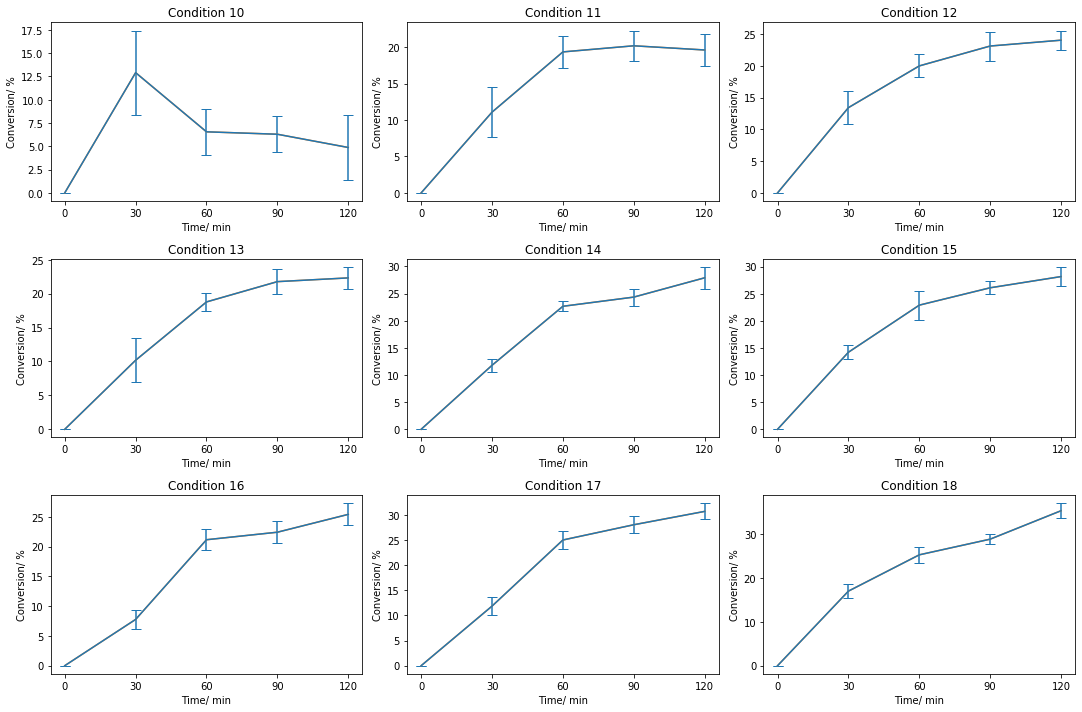

In [8]:
plt.figure(figsize=(15, 10))

for index, rows in df_conversion.iterrows():
    
    x = df_conversion.columns[1:] # Ignore Condition column during plotting
    
    y = rows[1:] # Ignore Condition column during plotting
    
    plt.subplot(3, 3, (1+index))
    
    plt.title('Condition ' + str(10+index))
    # np.round up to 1 d.p. for slug identity, then convert to string.
    
    plt.xlabel('Time/ min')

    plt.ylabel('Conversion/ %')
    
    plt.xticks([0,30,60,90,120]) # Set xticks to relevant time intervals.
    
    plt.errorbar(x, y, error_dict['c'+str(index+1)+'_error'], capsize = 5)
    
    plt.plot(x, y)
    
plt.tight_layout()
plt.show()

In [9]:
df_conversion.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_conversion.csv', index=False)

In [10]:
df_error.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_error.csv', index=False)